<a href="https://colab.research.google.com/github/manthanawgan/ML-Algorithms/blob/main/Linear_Gradient_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#generate data

np.random.seed(0)       #synthetc data for binary classification
num_observations = 500

class_0 = np.random.multivariate_normal([30, 60], [[5, 1], [1, 5]], num_observations)       #creating 2 clusters for clas 1 and class 2
class_1 = np.random.multivariate_normal([40, 80], [[5, 1], [1, 5]], num_observations)

X = np.vstack((class_0, class_1))         #label for the data
y= np.hstack((np.zeros(num_observations), np.ones(num_observations)))



In [ ]:
def Sigmoid(z):
  return 1/(1 + np.exp(-z))

def compute_cost(X, y, weight):       #Log Loss
  m = len(y)
  z = np.dot(X, weight)
  predictions = Sigmoid(z)
  cost = -1/m * np.sum(y*np.log(predictions) + (1-y)*np.log(1-predictions))
  return cost

def GradientDescent(X, y, weight, learning_rate, iterations):
  m = len(y)
  cost_history = []

  for i in range(iterations):
    z = np.dot(X, weight)
    predictions = Sigmoid(z)
    gradient = np.dot(X.T, (predictions - y)/m)
    weight -= learning_rate * gradient
    cost = compute_cost(X, y, weight)
    cost_history.append(cost)

    if i % 100 == 0:
      print(f"iteration: {i},cost: {compute_cost}")

  return weight, cost_history

In [ ]:
#adding intercept term

intercept = np.ones((X.shape[0], 1))
X = np.hstack((intercept, X))
weight = np.zeros(X.shape[1])

In [ ]:
#Training the model

learning_rate = 0.01
iterations = 1000
final_weight, cost_history = GradientDescent(X, y, weight, learning_rate, iterations)

iteration: 0,cost: <function compute_cost at 0x7c9a1872d440>
iteration: 100,cost: <function compute_cost at 0x7c9a1872d440>
iteration: 200,cost: <function compute_cost at 0x7c9a1872d440>
iteration: 300,cost: <function compute_cost at 0x7c9a1872d440>
iteration: 400,cost: <function compute_cost at 0x7c9a1872d440>
iteration: 500,cost: <function compute_cost at 0x7c9a1872d440>
iteration: 600,cost: <function compute_cost at 0x7c9a1872d440>
iteration: 700,cost: <function compute_cost at 0x7c9a1872d440>
iteration: 800,cost: <function compute_cost at 0x7c9a1872d440>


<ipython-input-4-84e03da752ca>:8: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(y*np.log(predictions) + (1-y)*np.log(1-predictions))
<ipython-input-4-84e03da752ca>:8: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(y*np.log(predictions) + (1-y)*np.log(1-predictions))


iteration: 900,cost: <function compute_cost at 0x7c9a1872d440>


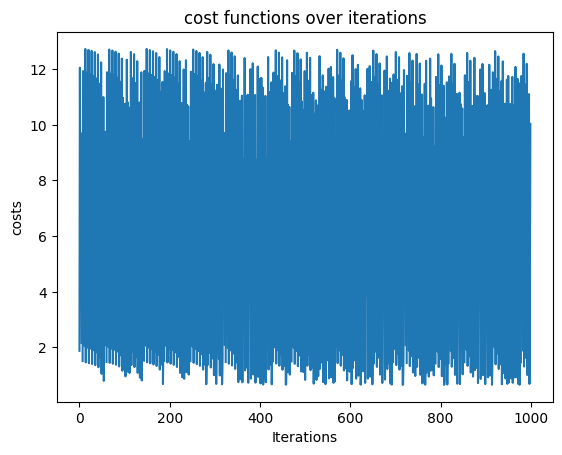

In [ ]:
#visualising the cost function

plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('costs')
plt.title('cost functions over iterations')
plt.show()

In [ ]:
def predict(X, weight):
  probabilities = Sigmoid(np.dot(X, weight))
  return[1 if p >= 0.5 else 0 for p in probabilities]

predictions = predict(X, final_weight)


In [ ]:
#evaluatin the model

accuracy = np.mean(predictions == y) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 50.00%
